In [ ]:
print(dist_list, two_sigma_list)
plt.scatter(dist_list,two_sigma_list)
plt.xlabel("distance [arcmin]")
plt.ylabel("2σ [arcmin]")
plt.grid()

linear_model=np.polyfit(dist_list,two_sigma_list,2)
linear_model_fn=np.poly1d(linear_model)
#x_s=np.arange(0,N+1)
x_s=np.arange(0,d+1)
plt.plot(x_s,linear_model_fn(x_s),color="red")
print(linear_model_fn)

In [ ]:
print(dist_list, mean_sigma_list)
plt.scatter(dist_list,mean_sigma_list)
plt.xlabel("distance [arcmin]")
plt.ylabel("mean+sigma [arcmin]")
plt.grid()

linear_model=np.polyfit(dist_list,mean_sigma_list,1)
linear_model_fn=np.poly1d(linear_model)
#x_s=np.arange(0,N+1)
x_s=np.arange(0,d+1)
plt.plot(x_s,linear_model_fn(x_s),color="red")
print(linear_model_fn)

distance =  0
mean_of_mean =  0.0018878890409709725
Standard deviation =  1.0818997656439497
distance =  1
mean_of_mean =  0.4962429787482732
Standard deviation =  1.1274574538913587
distance =  2
mean_of_mean =  0.9973047799932673
Standard deviation =  1.2742165592155352
distance =  3
mean_of_mean =  1.5058530298738146
Standard deviation =  1.4841469638457636
distance =  4
mean_of_mean =  1.9947624294012791
Standard deviation =  1.744371345962927
distance =  5
mean_of_mean =  2.5026384097520022
Standard deviation =  2.0124944858941025
[1.0837876546849208, 1.6237004326396318, 2.2715213392088023, 2.9899999937195783, 3.7391337753642064, 4.515132895646104]


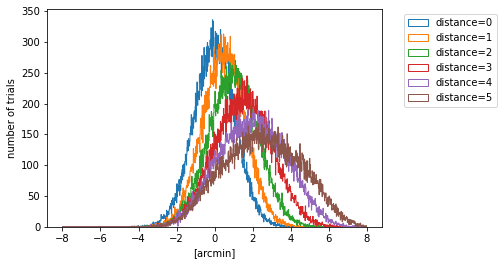

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
N=10

FWHM=8
dist_list=[]
sigma_list=[]
mean_sigma_list=[]
hist_list=[]

min = -8
max = 8
numbin = 1000

for d in range(0, 6):
    ni=[1.0,0.7,0.5,0.3,0.] #ここで0から1までの間で一様乱数を発生させリストを１つ作る
    dist_list.append(d)
    print("distance = ", d)
    mean_list=[]
    for i in range(10000):
        A = []
        for n in range(len(ni)):
            n1=int(N*ni[n])
            n2=N-n1
            a1=np.random.normal(
                loc   = 0,
                scale = FWHM/2.35,
                size  = n1,
                )
            #print("a1= ", a1)
            a2=np.random.normal(
                loc   = d,
                scale = FWHM/2.35,
                size  = n2,
                )
            #print("a2 ", a2)
            A=np.append(a1,a2)
            #print(A)
            mean=np.mean(A)
            mean_list.append(mean)
            #print("n1 = ", n1)
            #print("n2 = ", n2)
            #print("mean = ", mean)
            #plt.hist(a1)
            #plt.hist(A,bins=50,histtype="step",label="gaus1:gaus2 = {:.1f} : {:.1f}".format(ni[n], 1-ni[n]))
            #plt.xlabel("[arcmin]")
            #plt.ylabel("number of trials")
            #plt.legend(bbox_to_anchor=(1.05,0.9))
        #print("mean_list =", mean_list)

    res=plt.hist(mean_list, bins=numbin,histtype="step",range=(min,max),label="distance=%d" %d)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    hist_list.append(res)
    mean_of_mean=np.mean(mean_list)
    print("mean_of_mean = ", mean_of_mean)

    plt.xlabel("[arcmin]")
    plt.ylabel("number of trials")


    #print("total mean_list =", mean_list)
    st_d=np.std(mean_list)
    sigma_list.append(st_d)
    mean_plus_sigma=mean_of_mean+st_d
    mean_sigma_list.append(mean_plus_sigma)
    print("Standard deviation = ", st_d)
print(mean_sigma_list)

In [104]:
axis_list=hist_list[0][1]
counts_list=hist_list[0][0]

print(axis_list)
print(counts_list)

print(axis_list[17])

[-8.    -7.984 -7.968 ...  7.968  7.984  8.   ]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0

853.0
1454.0
1986.0
2527.0
3166.0
3775.0
4400.0
4986.0
5526.0
6107.0
6704.0
7317.0
7886.0
8470.0
9051.0
9605.0
10179.0
10747.0
11334.0
11928.0
12505.0
13015.0
13547.0
14137.0
14653.0
15224.0
15783.0
16315.0
16870.0
17417.0
17973.0
18500.0
19011.0
19512.0
20060.0
20576.0
21063.0
21564.0
22061.0
22539.0
22976.0
23487.0
23954.0
24388.0
24843.0
25342.0
25834.0
26317.0
26777.0
27229.0
27666.0
28096.0
28557.0
28996.0
29422.0
29826.0
30252.0
30689.0
31091.0
31486.0
31867.0
32208.0
32620.0
33004.0
33342.0
33719.0
34067.0
34439.0
34789.0
35121.0
35482.0
35810.0
36129.0
36462.0
36779.0
37115.0
37459.0
37764.0
38082.0
38406.0
38718.0
38997.0
39254.0
39525.0
39802.0
40072.0
40322.0
40583.0
40822.0
41065.0
41302.0
41520.0
41716.0
41931.0
42151.0
42393.0
42607.0
42802.0
42982.0
43160.0
43353.0
43529.0
43710.0
43892.0
44097.0
44249.0
44427.0
44596.0
44755.0
44907.0
45071.0
45213.0
45361.0
45499.0
45609.0
45730.0
45886.0
46019.0
46139.0
46251.0
46388.0
46513.0
46606.0
46732.0
46827.0
46916.0
47008.0
4

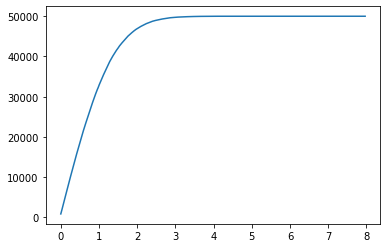

In [105]:
area0=counts_list[int(numbin/2)]
d_list=[]
area_list=[]

for i in range (int((numbin/2)-1)):
    d_list.append(i*(max-min)/numbin)
    count0_p = counts_list[int(numbin/2)+i+1]
    count0_m = counts_list[int(numbin/2)-i-1]
    area0=area0+count0_p+count0_m
    area_list.append(area0)
    print(area0)

print(area0)
plt.plot(d_list, area_list)

In [62]:
counts_list[int(numbin/2)]

5985.0

50000.0
50000.0
50000.0
50000.0
49998.0
49970.0


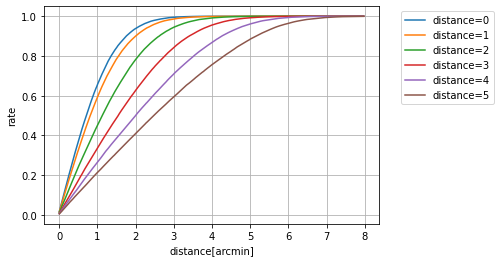

In [106]:
for a in range(0,6):
    b=0
    counts_list=hist_list[a][b]
    area0=counts_list[int(numbin/2)]
    
    d_list=[]
    area_list=[]

    for i in range (int((numbin/2)-1)):
        d_list.append(i*(max-min)/numbin)
        count0_p = counts_list[int(numbin/2)+i+1]
        count0_m = counts_list[int(numbin/2)-i-1]
        area0=area0+count0_p+count0_m
        area_list.append(area0)
        rate_list= [x/50000 for x in area_list]
        #print(area0)

    print(area0)
    plt.plot(d_list, rate_list ,label="distance=%d" %a)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.grid(True)
    plt.xlabel("distance[arcmin]")
    plt.ylabel("rate")